# 中国社会幸福感探索性分析

幸福感是人们生活中非常重要的心理指数，在社会科学的研究中，幸福感的研究占有重要的位置。幸福感不仅是哲学问题，同时也是心理学、社会学、经济学、宗教等等领域经常研究的问题。那么影响幸福感的因素有哪些，影响幸福感的因素非常多，例如经济因素、人口属性、社交生活、资源配置等等。本案例基于中国人民大学公开的数据，对幸福感和各个属性的关系做了可视化分析。

# 1.数据说明&读取
本次数据是基于问卷调查的数据，包含人口学信息、经济状况、社交属性、宗教信仰等等。以下为本次数据所有属性的含义描述。

| 列名 | 类型 | 含义说明 
| ------ | ------ |------ |
|id	|int64	|编号
|happiness	|int64	|总的来说，您觉得您的生活是否幸福
|survey_type	|int64	|样本类型
|province	|int64	|采访地点-省/自治区/直辖市编码
|city	|int64	|采访地点-地级市编码
|county	|int64	|采访地点-县/区编码
|survey_time	|object	|问卷当前时间
|gender	|int64	|您的性别
|birth	|int64	|您的出生日期-年
|nationality	|int64	|您的民族
|religion	|int64	|您的宗教信仰-不信仰宗教
|religion_freq	|int64	|您参加宗教活动的频繁程度
|edu	|int64	|您目前的最高教育程度（包括目前在读的）
|income	|int64	|您个人去年全年的总收入
|political	|int64	|您目前的政治面貌
|floor_area	|float64	|您现在住的这座住房的套内建筑面积
|height_cm	|int64	|您目前的身高是（厘米）
|weight_jin	|int64	|您目前的体重是（斤）
|health	|int64	|您觉得您目前的身体健康状况
|health_problem	|int64	|在过去的四周中由于健康问题影响到您的工作或其他日常活动的频繁程度
|depression	|int64	|在过去的四周中您感到心情抑郁或沮丧的频繁程度
|hukou	|int64	|您目前的户口登记状况
|socialize	|int64	|在过去一年中，您是否经常在您的空闲时间做下面的事情-社交
|relax	|int64	|在过去一年中，您是否经常在您的空闲时间做下面的事情-休息放松
|learn	|int64	|在过去一年中，您是否经常在您的空闲时间做下面的事情-学习充电
|equity	|int64	|总的来说，您认为当今社会公不公平
|class	|int64	|您认为自己目前处于哪个等级上
|work_exper	|int64	|您的工作经历及状况
|work_status	|float64	|下列各种情形，哪一种更符合您目前工作的状况
|work_yr	|float64	|从您第一份非农工作到目前的工作，您一共工作了多少年
|work_type	|float64	|您目前工作的性质
|work_manage	|float64	|您目前工作的管理活动情况
|family_income	|float64	|您家去年全年家庭总收入
|family_m	|int64	|您家目前住在一起的通常有几人（包括您本人）
|family_status	|int64	|您家的家庭经济状况在所在地属于哪一档
|house	|int64	|您家现拥有几处房产
|car	|int64	|您家是否拥有家用小汽车
|marital	|int64	|您目前的婚姻状况
|status_peer	|int64	|与同龄人相比，您本人的社会经济地位怎样
|status_3_before	|int64	|与三年前相比，您的社会经济地位发生了什么变化
|view	|int64	|根据您的一般印象您对一些重要事情所持的观点和看法与社会大众一致的时候有多少
|inc_ability	|int64	|考虑到您的能力和工作状况，您目前的收入是否合理

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot #动态画图库
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns #在matplotlib基础上面的封装画图库
dataHappiness=pd.read_csv('./happiness1.csv', encoding='iso-8859-1')
print(dataHappiness.shape)

(8000, 42)


首先导入数据，数据总共8000行42列

# 2.数据处理

## 2.1空值处理

In [2]:
print(dataHappiness.isnull().sum())

id                    0
happiness             0
survey_type           0
province              0
city                  0
county                0
survey_time           0
gender                0
birth                 0
nationality           0
religion              0
religion_freq         0
edu                   0
income                0
political             0
floor_area            0
height_cm             0
weight_jin            0
health                0
health_problem        0
depression            0
hukou                 0
socialize             0
relax                 0
learn                 0
equity                0
class                 0
work_exper            0
work_status        5049
work_yr            5049
work_type          5049
work_manage        5049
family_income         1
family_m              0
family_status         0
house                 0
car                   0
marital               0
status_peer           0
status_3_before       0
view                  0
inc_ability     

可以看出`work_status`、`work_yr`、`work_type`、`work_manage`这四列空值过多，因此删除，`family_income`有一个空值，删除这一行。

In [3]:
#删除空值
dataHappiness.drop(['work_status','work_yr','work_type','work_manage'],axis=1,inplace=True)
dataHappiness.drop(dataHappiness[dataHappiness['family_income'].isnull()==True].index,axis=0,inplace=True)

In [4]:
print(dataHappiness.isnull().sum())
print(dataHappiness.shape)

id                 0
happiness          0
survey_type        0
province           0
city               0
county             0
survey_time        0
gender             0
birth              0
nationality        0
religion           0
religion_freq      0
edu                0
income             0
political          0
floor_area         0
height_cm          0
weight_jin         0
health             0
health_problem     0
depression         0
hukou              0
socialize          0
relax              0
learn              0
equity             0
class              0
work_exper         0
family_income      0
family_m           0
family_status      0
house              0
car                0
marital            0
status_peer        0
status_3_before    0
view               0
inc_ability        0
dtype: int64
(7999, 38)


可以看出删除后，没有空值，接着继续分析

## 2.2剔除无关属性

首先，发现id是每个数据都独有的，因此对数据分析没有任何区分能力，将`id`删除

In [5]:
dataHappiness.drop(['id'],axis=1,inplace=True)

## 2.3异常值检测

在本次数据中，数据为-8代表异常数据，下边检测一下哪些特征包含异常值，以及异常值的数量是多少。

In [6]:
for i in dataHappiness.columns:
    n=dataHappiness[dataHappiness[i]==-8].happiness.count()
    if n>0:
        print(i,n)

happiness 12
nationality 18
religion 108
religion_freq 15
edu 11
political 41
health 5
health_problem 43
depression 16
socialize 6
relax 17
learn 21
equity 42
class 81
family_status 46
car 10
status_peer 49
status_3_before 48
view 208
inc_ability 965


可以看出大部分列异常值较少，当前暂不处理，当分析到相关维度时再进行处理。

## 2.4各属性数据种类统计

接着看看数据中各个属性的取值类型，以及对应由多少条不重复的值，如果某列值全部为同一个值的话，需要删掉。

In [7]:
dataHappinessInfo=pd.DataFrame({'属性':[],'值类型':[],'属性类别数量':[]})
for i in range(len(dataHappiness.columns)):
    dataHappinessInfo.loc[i,'属性']=dataHappiness.columns[i]
    dataHappinessInfo.loc[i,'值类型']=dataHappiness[dataHappiness.columns[i]].dtype
    dataHappinessInfo.loc[i,'属性类别数量']=int(len(dataHappiness[dataHappiness.columns[i]].unique()))
    dataHappinessInfo['属性类别数量']=dataHappinessInfo['属性类别数量'].astype('int')

In [8]:
dataHappinessInfo.set_index('值类型').sort_index(ascending=True)  

,属性,属性类别数量
值类型,,
int64,happiness,6
int64,hukou,8
int64,socialize,6
int64,relax,6
int64,learn,6
int64,equity,6
int64,class,11
int64,depression,6
int64,work_exper,6


从结果可以看出并没有某列取值唯一的情况，并且大部分数据都是数值型，只有`调查时间(survey_time)`是字符串型，下边我们分析一下时间。

## 2.5数据调查时间分析

In [9]:
dataHappiness['survey_time'].head()

0     2015/8/4 14:18
1    2015/7/21 15:04
2    2015/7/21 13:24
3    2015/7/25 17:33
4     2015/8/10 9:50
Name: survey_time, dtype: object

首先可以看出调查时间精确到分钟，但`survey_time`的类型为字符串型，为了方便分析，我们将其转为datetime类型数据。

In [10]:
import time 
import datetime
def TransferToDatetime(data,colname):
    fmt = '%Y/%m/%d %H:%M'
    timeList=[]
    for i in data[colname]:
        year, month, day,hour,minute = time.strptime(i, fmt)[:5]
        timeList.append(datetime.datetime(year, month, day,hour,minute))
    return timeList

In [11]:
dataHappiness['survey_time']=TransferToDatetime(dataHappiness,'survey_time')

In [12]:
dataHappiness['survey_time'].head()

0   2015-08-04 14:18:00
1   2015-07-21 15:04:00
2   2015-07-21 13:24:00
3   2015-07-25 17:33:00
4   2015-08-10 09:50:00
Name: survey_time, dtype: datetime64[ns]

我们可以看出`survey_time`已经转成了datetime格式，下边我们分析本次数据在时间上的统计。

In [13]:
dataHappiness['survey_time'].dt.year.value_counts()

2015    7999
Name: survey_time, dtype: int64

我们发现本次数据全部是2015年的数据，接下来我们分析日期的统计。

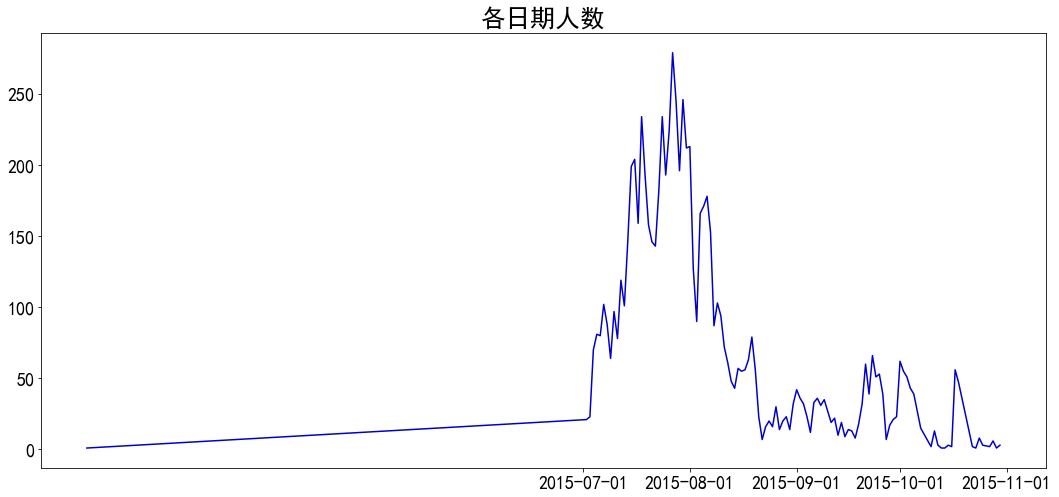

In [14]:
plt.figure(figsize=(18,8),facecolor='white')
dataHappiness['survey_time'].dt.date.value_counts().sort_index().plot(color='mediumblue')
plt.xticks(['2015-07-01','2015-08-01','2015-09-01','2015-10-01','2015-11-01'], size = 18)
#plt.xlim(xmin = '2015-07-01')
plt.yticks(size = 18)
plt.title(u'各日期人数',fontsize=25)
plt.show()

可以看出，调查数据的月份分布不均衡，主要集中在7月和8月，说明本次问卷调查主要集中在这两个月，但考虑到调查月份可能不太会影响幸福感，因此对调查月份不做进一步分析。

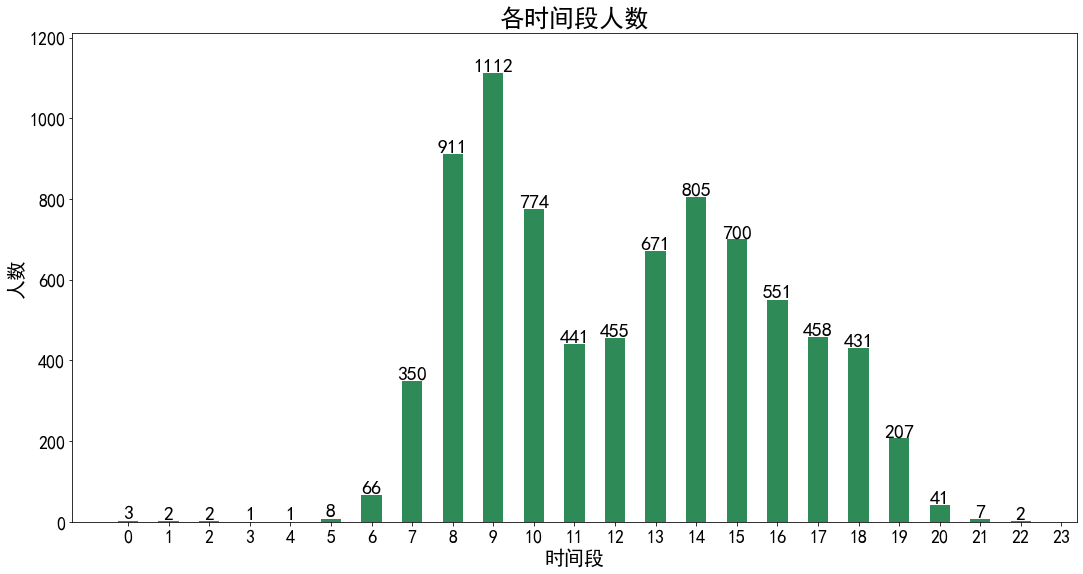

In [15]:
Hour=dataHappiness['survey_time'].dt.hour.value_counts().sort_index().index.tolist()     #记录月份
HourNum=dataHappiness['survey_time'].dt.hour.value_counts().sort_index().values.tolist() #记录各月份人数
#准备画板
plt.figure(figsize=(18,9),facecolor='w')
rects=plt.bar(range(len(Hour)), HourNum, width=0.5,color='SeaGreen')
#横轴
plt.xticks(range(24), range(24))       
plt.xlabel(u"时间段",fontsize='20')      
#纵轴
plt.ylim(0,max(HourNum)+100)
plt.ylabel(u"人数",fontsize='20') #Y轴标签
#画出柱状图数值
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha='center', va='bottom',fontsize=20)
plt.tick_params(labelsize=18)
plt.title(u'各时间段人数',fontsize=25)
plt.show()

分析发现，调查数据来源主要集中在早上6点至晚上20点，以上分析对本次数据的时间属性有了初步了解，下边我们分析幸福感的具体差异。

# 3.幸福感分析

## 3.1定义统计函数和作图函数

In [16]:
def dataCompute(Data,col,name,seq=True):
    #定义数据统计的函数，Data为传入的原始数据，col是要统计的列名，name为该列各值含义（按等级排序）,seq为值取正序还是倒序
    count=len(Data[col].value_counts())
    valueIndex=Data[col].value_counts().sort_index().index.tolist()
    n=np.zeros(count)
    data=pd.DataFrame({
            col:name,
            'Nums':n,
            '幸福':n,
            '不知道':n,
            '不幸福':n,
            '幸福比例':n,
            '不知道比例':n,
            '不幸福比例':n,
            '幸福差':n,  
            #幸福差表示幸福比例数据减去不幸福比例数据。
            #其含义是某个群体中幸福人群比例比不幸福人群比例多多少，越大说明该群体幸福的人越多
        })
    i=0
    for j in valueIndex:
        if seq:
            value=j
        else:
            value=count-j+1
        data.iloc[i,1]=Data[col].value_counts().sort_index()[value]
        data.iloc[i,2]=sum(Data[Data[col]==value].Happy=='幸福')
        data.iloc[i,3]=sum(Data[Data[col]==value].Happy=='不知道')
        data.iloc[i,4]=sum(Data[Data[col]==value].Happy=='不幸福')
        data.iloc[i,5]=round(data.iloc[i,2]/data.iloc[i,1],2)
        data.iloc[i,6]=round(data.iloc[i,3]/data.iloc[i,1],2)
        data.iloc[i,7]=round(data.iloc[i,4]/data.iloc[i,1],2)
        data.iloc[i,8]=data.iloc[i,5]-data.iloc[i,7]
        i+=1
    return data

In [17]:
def makePicture(Data,name,col,title,sort=False,tickangle_=0,colors=['teal','royalblue','magenta']):
    if sort:
        Data=Data.sort_values(by=col)
    data=[]
    for i in range(len(col)):
        trace_ = go.Scatter(x=Data[name],y=Data[col[i]],name=col[i],mode='lines+markers',line=dict(width=3,color=colors[i]),)
        data.append(trace_)
    layout = dict(title = title,
              plot_bgcolor='white',
              xaxis= dict(showgrid=True,gridcolor='lightgrey',tickfont=dict(size=15,color='black'),ticklen= 15,tickangle=tickangle_,zeroline= True,),
              yaxis=dict(showgrid=True,gridcolor='lightgrey',title='',tickfont=dict(size=15,color='black'),ticklen= 15),
                  )
    fig=dict(data=data,layout=layout)
    iplot(fig)

## 3.2幸福感分布情况

In [18]:
dataHappiness.happiness.value_counts().sort_index()

-8      12
 1     104
 2     497
 3    1158
 4    4818
 5    1410
Name: happiness, dtype: int64

幸福感这个数据中，1 = 非常不幸福; 2 = 比较不幸福; 3 = 说不上幸福不幸福; 4 = 比较幸福; 5 = 非常幸福；可以看出-8是一个异常值，因此在分析幸福感时先将异常值剔除。

In [19]:
dataHappiness.happiness.replace(-8,np.nan,inplace = True)
dataHappiness.dropna(axis=0,how='any',inplace=True)
dataHappiness.shape

(7987, 37)

剔除`幸福感(happiness)`的异常值后，剩7987行数据，接着再看看幸福感的数据如何分布

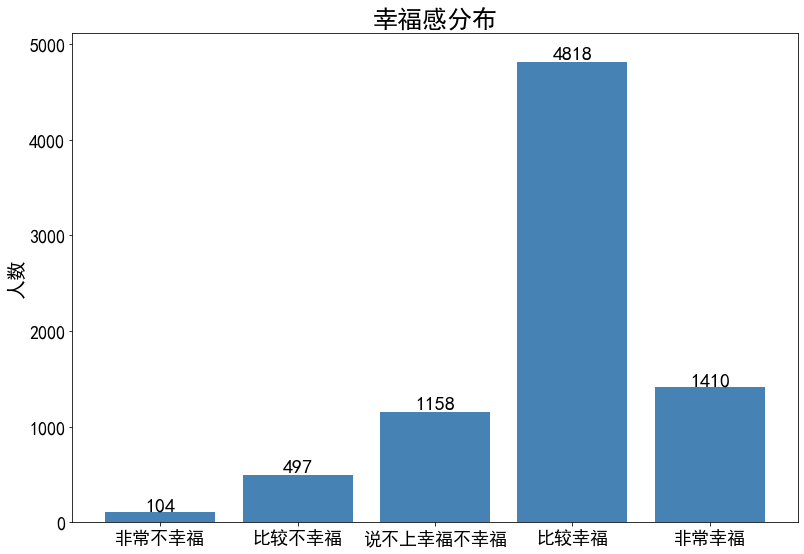

In [20]:
Happiness=[ '非常不幸福','比较不幸福','说不上幸福不幸福','比较幸福', '非常幸福']
HappinessNum=dataHappiness.happiness.value_counts().sort_index().values.tolist() #记录各月份人数
#准备画板
plt.figure(figsize=(13,9),facecolor='w')
rects=plt.bar(range(len(Happiness)), HappinessNum, color='SteelBlue')
#横轴
index=range(len(Happiness))
plt.xticks(index, Happiness)       
# #Y轴
plt.ylim(0,max(HappinessNum)+300)
plt.ylabel(u"人数",fontsize='20') #Y轴标签
#画出柱状图数值
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha='center', va='bottom',fontsize=20)
plt.tick_params(labelsize=18)
plt.title(u'幸福感分布',fontsize=25)
plt.show()

将高于3的值定义为幸福，低于3的值定义为不幸福，等于3的值定义为不知道。

In [21]:
dataHappiness[dataHappiness.happiness>3].happiness.value_counts()
HappyLevel=[]
for i in dataHappiness.happiness:
    if i>3:
        HappyLevel.append('幸福')
    elif i<3:
        HappyLevel.append('不幸福')
    else:
        HappyLevel.append('不知道')
dataHappiness['Happy']=HappyLevel
dataHappiness.Happy.value_counts()

幸福     6228
不知道    1158
不幸福     601
Name: Happy, dtype: int64

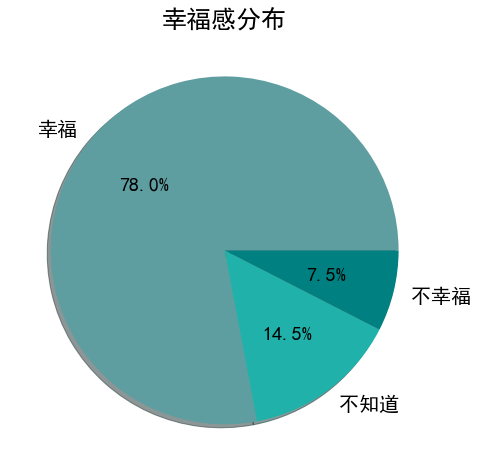

In [22]:
f,ax=plt.subplots(figsize=(18,8))
dataHappiness.Happy.value_counts().plot.pie(autopct='%1.1f%%',colors = ['cadetblue','lightseagreen','teal'] ,ax=ax,shadow=True,fontsize=20)
ax.set_title('幸福感分布',fontsize=25)
ax.set_ylabel('')
plt.show()

## 3.3相关分析

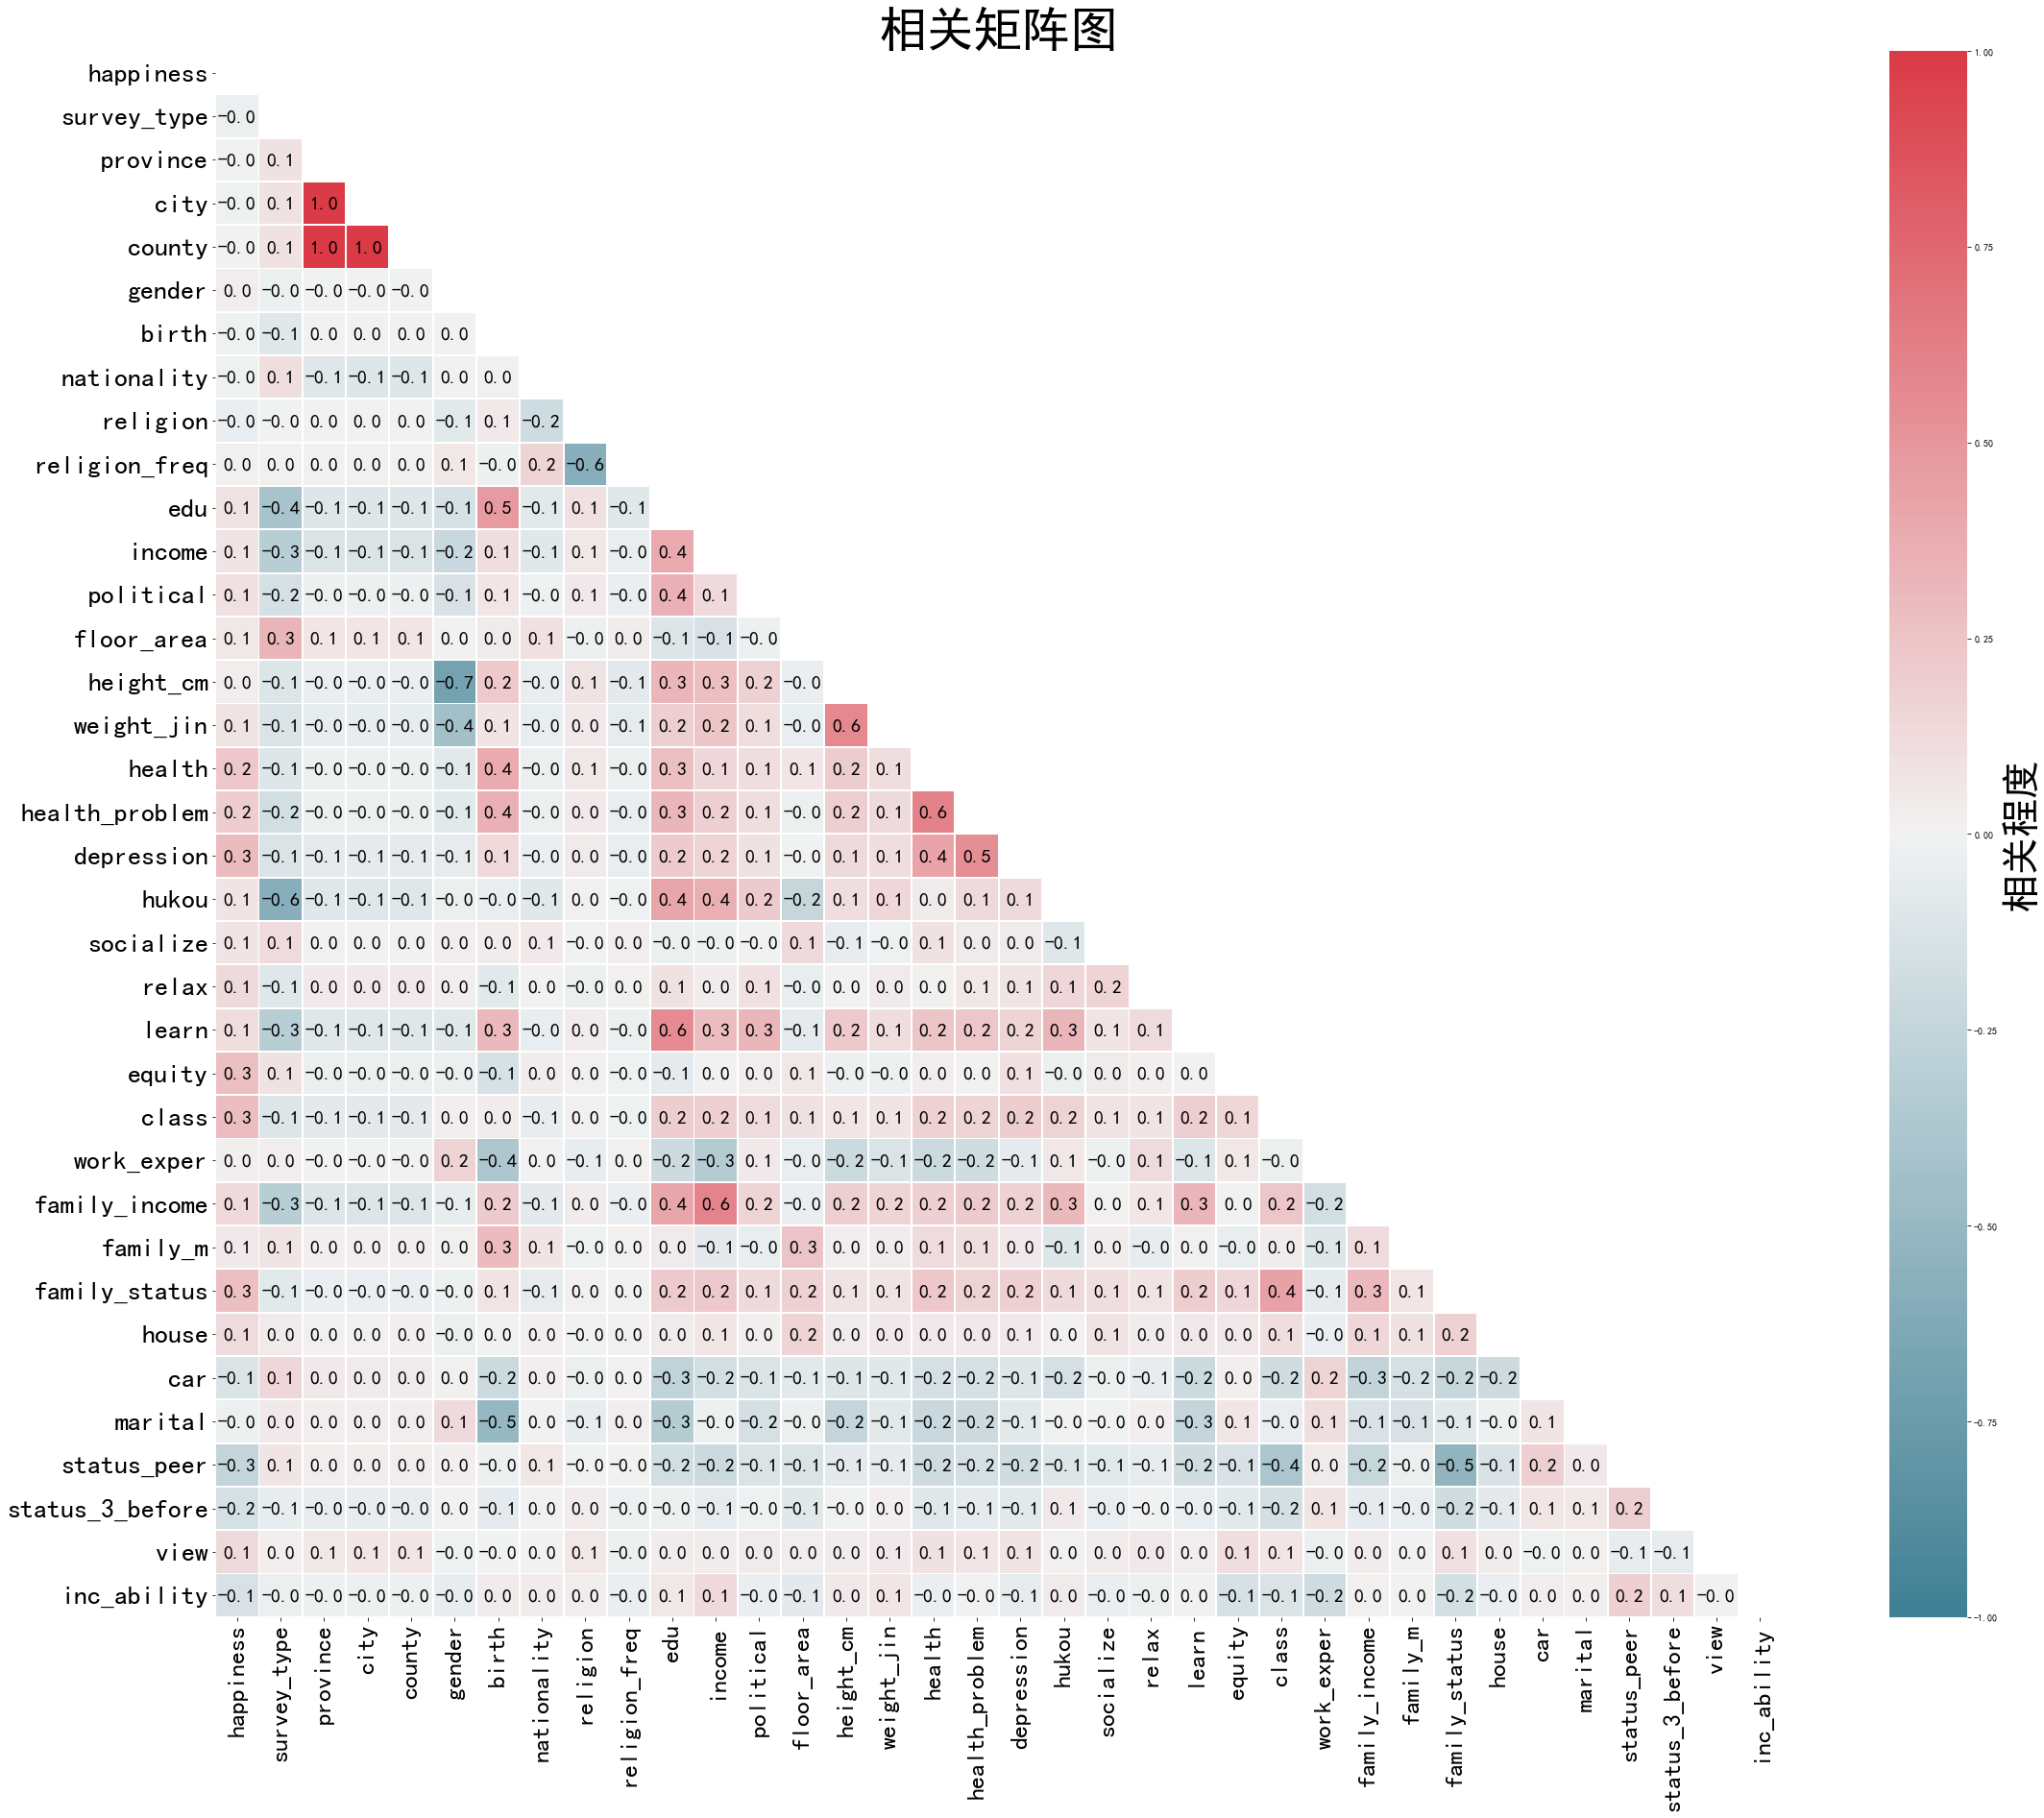

In [23]:
#相关程度分析
import seaborn as sns
f, ax= plt.subplots(figsize = (40, 30))
colnm = dataHappiness.columns.tolist()  
mcorr = dataHappiness[colnm].corr(method="spearman")  # 相关矩阵
mask = np.zeros_like(mcorr, dtype=np.bool)  # 构造相关矩阵 bool型
mask[np.triu_indices_from(mask)] = True  # 设置对角线
cmap = sns.diverging_palette(220,10,as_cmap=True)  #设置颜色sns.husl_palette(10, l=.4)
sns.heatmap(mcorr, mask=mask, cmap=cmap, vmax = 1,vmin=-1,linewidths=1,cbar =True,
            cbar_kws={'label': u'相关程度'},square=True,annot=True,annot_kws={'size':20,'color':'black'}, fmt='0.1f',ax=ax)  # 热力图
ax.set_title('相关矩阵图',fontsize=50)
ax.figure.axes[-1].yaxis.label.set_size(40)#设置图例标题大小
ax.tick_params(axis='y',labelsize=28) # y轴字体大小
ax.tick_params(axis='x',labelsize=26) # x轴字体大小
plt.show()

## 3.4城镇类型与幸福感

在数据中`survey_type`代表样本类型，1代表城市样本，2代表农村样本

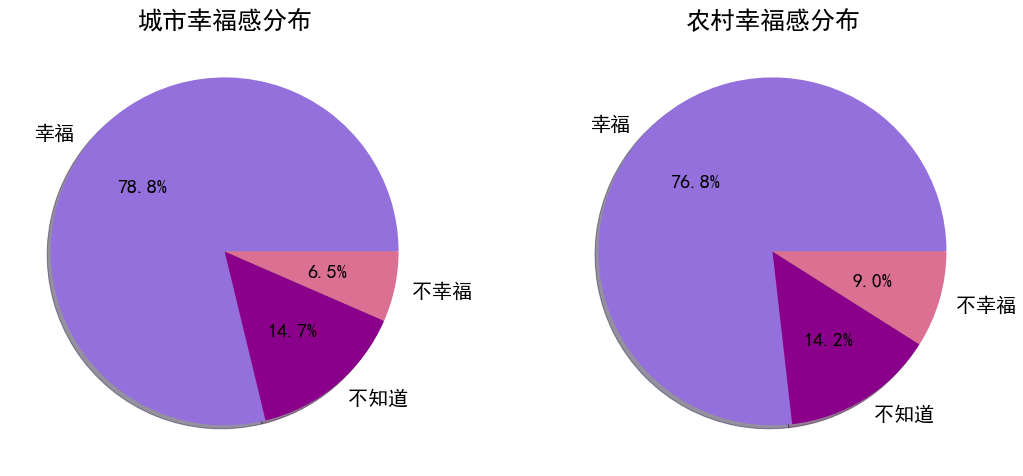

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=  ['mediumpurple','darkmagenta','palevioletred']
dataHappiness[dataHappiness['survey_type']==1].Happy.value_counts().plot.pie(autopct='%1.1f%%',colors =colors ,ax=ax[0],shadow=True,fontsize=20)
ax[0].set_title('城市幸福感分布',fontsize=25)
ax[0].set_ylabel('')
dataHappiness[dataHappiness['survey_type']==2].Happy.value_counts().plot.pie(autopct='%1.1f%%',colors = colors,ax=ax[1],shadow=True,fontsize=20)
ax[1].set_title('农村幸福感分布',fontsize=25)
ax[1].set_ylabel('')
plt.show()

可以看出在城市和农村，幸福的人比重差异不大，但农村不幸福的人相对来说比城市多一点，这可能是因为农村毕竟经济和文化相对滞后，因此不幸福的人会更多一点。

## 3.5省份与幸福感

In [25]:
#在原始的问卷中给出的省份清单如下，现在需要统计在数据中各个省份的数量,并找到省份为0的省并删除该省份。

"""1 = 上海市; 2 = 云南省; 3 = 内蒙古自治区; 4 = 北京市; 5 = 吉林省; 6 = 四川省; 7 = 天津市; 
8 = 宁夏回族自治区; 9 = 安徽省; 10 = 山东省; 11 = 山西省; 12 = 广东省; 13 = 广西壮族自治区; 
14 = 新疆维吾尔自治区; 15 = 江苏省; 16 = 江西省; 17 = 河北省; 18 = 河南省; 19 = 浙江省; 
20 = 海南省; 21 = 湖北省; 22 = 湖南省; 23 = 甘肃省; 24 = 福建省; 25 = 西藏自治区; 
26 = 贵州省; 27 = 辽宁省; 28 = 重庆市; 29 = 陕西省; 30 = 青海省; 31 = 黑龙江省; """

provinceList=['上海市','云南省','内蒙古自治区','北京市','吉林省','四川省','天津市','宁夏回族自治区','安徽省','山东省','山西省','广东省','广西壮族自治区','新疆维吾尔自治区'
,'江苏省','江西省','河北省','河南省','浙江省','海南省','湖北省','湖南省','甘肃省','福建省','西藏自治区','贵州省','辽宁省','重庆市','陕西省','青海省','黑龙江省']
for i in range(1,len(provinceList)+1):
    if i not in dataHappiness.province.value_counts().index.tolist():
        print(i,provinceList[i-1])

14 新疆维吾尔自治区
20 海南省
25 西藏自治区


可以看出本次数据统计的省份中没有新疆维吾尔自治区、海南省、西藏自治区，因此先从身份列表中删除这三个省，方便后续进行统计分析。

In [26]:
provinceList.remove('新疆维吾尔自治区')
provinceList.remove('海南省')
provinceList.remove('西藏自治区')

In [27]:
#生成省份幸福感数据
dataProvince=dataCompute(dataHappiness,'province',provinceList)
dataProvince

,province,Nums,幸福,不知道,不幸福,幸福比例,不知道比例,不幸福比例,幸福差
0,上海市,392.0,272.0,94.0,26.0,0.69,0.24,0.07,0.62
1,云南省,280.0,206.0,46.0,28.0,0.74,0.16,0.10,0.64
2,内蒙古自治区,70.0,62.0,2.0,6.0,0.89,0.03,0.09,0.80
3,北京市,385.0,322.0,47.0,16.0,0.84,0.12,0.04,0.80
4,吉林省,349.0,289.0,39.0,21.0,0.83,0.11,0.06,0.77
5,四川省,414.0,279.0,104.0,31.0,0.67,0.25,0.07,0.60
6,天津市,213.0,183.0,20.0,10.0,0.86,0.09,0.05,0.81
7,宁夏回族自治区,70.0,48.0,10.0,12.0,0.69,0.14,0.17,0.52
8,安徽省,262.0,208.0,41.0,13.0,0.79,0.16,0.05,0.74
9,山东省,409.0,358.0,38.0,13.0,0.88,0.09,0.03,0.85


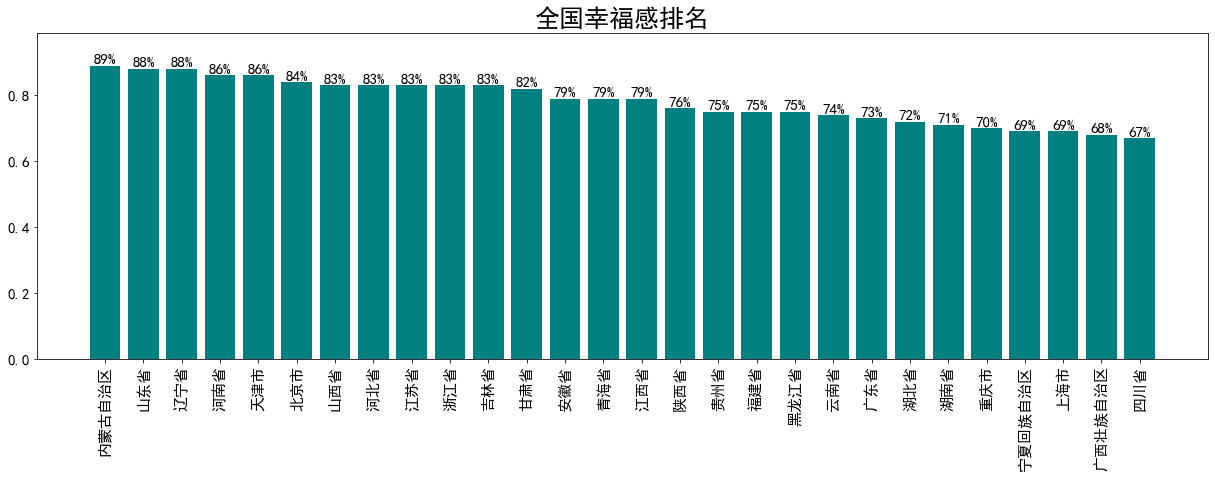

In [28]:
province_=dataProvince.sort_values(by='幸福比例',ascending=False).province.values.tolist()
province_Num=dataProvince.sort_values(by='幸福比例',ascending=False)['幸福比例'].values.tolist()
#准备画板
plt.figure(figsize=(21,6),facecolor='w')
rects=plt.bar(province_, province_Num, color='teal')
#横轴
index=range(len(province_))
plt.xticks(index, province_) 
plt.xticks(rotation=90,fontsize=8)
# #Y轴
plt.ylim(0,max(province_Num)+0.1)
#画出柱状图数值
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2,height,str(int(height*100))+'%', ha='center', va='bottom',fontsize=15)
plt.tick_params(labelsize=15)
plt.title(u'全国幸福感排名',fontsize=25)
plt.show()

可以看出内蒙古、山东、辽宁、河南、天津是幸福感最高的五个省市。

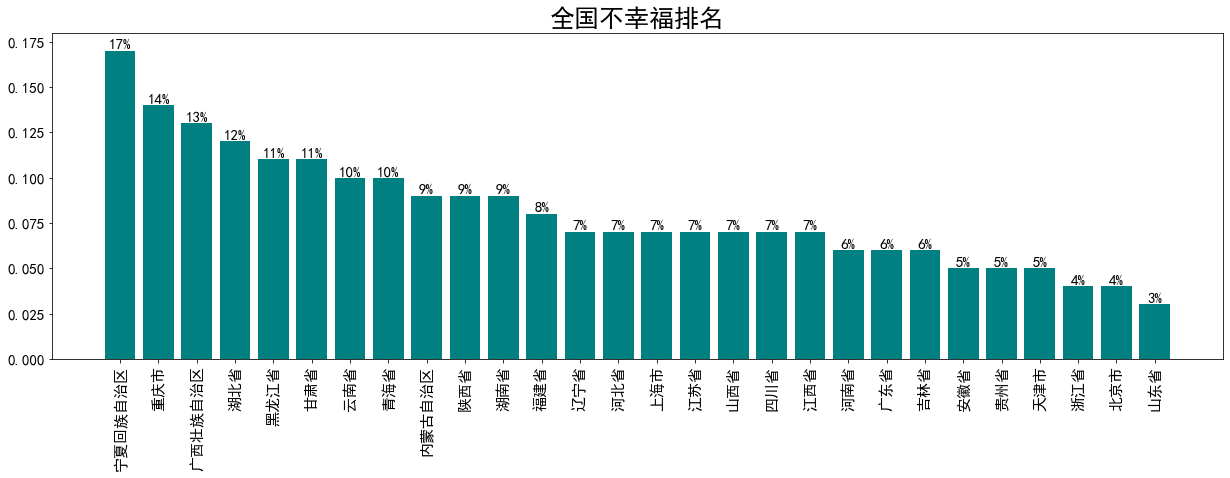

In [29]:
province_=dataProvince.sort_values(by='不幸福比例',ascending=False).province.values.tolist()
province_Num=dataProvince.sort_values(by='不幸福比例',ascending=False)['不幸福比例'].values.tolist()
#准备画板
plt.figure(figsize=(21,6),facecolor='w')
rects=plt.bar(province_, province_Num, color='teal')
#横轴
index=range(len(province_))
plt.xticks(index, province_) 
plt.xticks(rotation=90,fontsize=15)
# #Y轴
plt.ylim(0,max(province_Num)+0.01)
#画出柱状图数值
for rect in rects:
    height = rect.get_height()
#     height=height*100
    plt.text(rect.get_x() + rect.get_width() / 2,height,str(int(height*100))+'%', ha='center', va='bottom',fontsize=15)
plt.tick_params(labelsize=15)
plt.title(u'全国不幸福排名',fontsize=25)
plt.show()

宁夏、重庆、广西、湖北、黑龙江是五个不幸福感最高的五个地方，这个可能跟地区文化或经济各个因素都有关，下边我们分析性别与幸福感。

## 3.6年龄与幸福感

首先我们观察一下出生年份`birth`的分布情况。

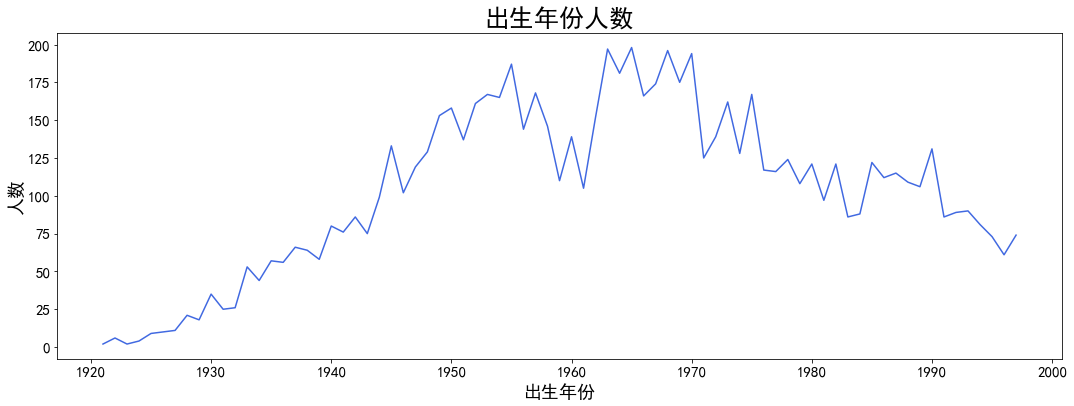

In [30]:
plt.figure(figsize=(18,6),facecolor='white')
dataHappiness['birth'].value_counts().sort_index().plot(color='royalblue')
plt.tick_params(labelsize=15)
plt.xlabel('出生年份',fontsize=18)
plt.ylabel('人数',fontsize=18)
plt.title(u'出生年份人数',fontsize=25)
plt.show()

可以看出出生年份分布在1920到2000之间，各阶段的人数也不等，为了方便分析，我们对出生年份进行操作，计算出每个个体的年龄，并对年龄做分段。

In [31]:
dataAge=dataHappiness.copy(deep=True)

In [32]:
#计算年龄，本次数据统计时间为2015年，因此直接用2015减去出生年份即可
dataAge['age']=0
ageList=[]
for i in dataAge['birth']:
    ageList.append(2015-i)
dataAge['age']=ageList

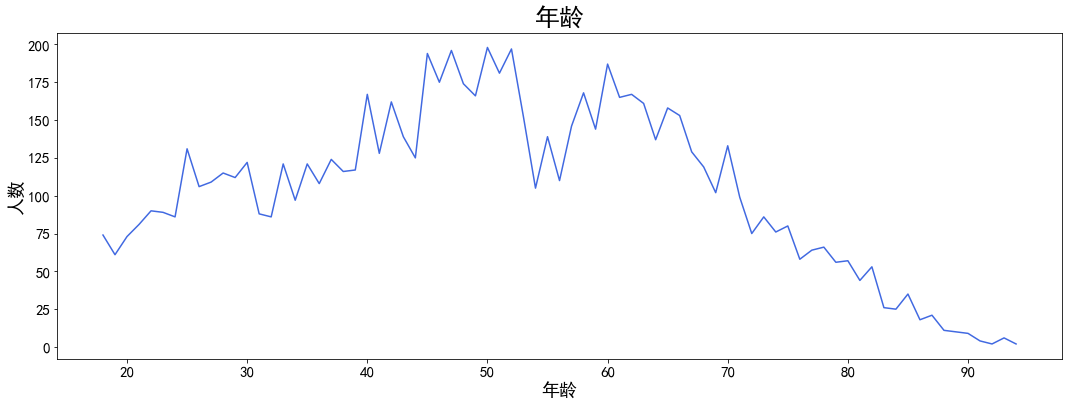

In [33]:
plt.figure(figsize=(18,6),facecolor='white')
dataAge['age'].value_counts().sort_index(ascending=False).plot(color='royalblue')
plt.tick_params(labelsize=15)
plt.xlabel('年龄',fontsize=18)
plt.ylabel('人数',fontsize=18)
plt.title(u'年龄',fontsize=25)
plt.show()

从上图年龄分布看出，年龄跨度较大，下边对各个年龄进行分段，30岁以后以10位单位进行划分，30岁以前以18、25、30位界限。

In [34]:
dataAge['ageLevel']=0
dataAge.loc[dataAge[(dataAge['age']<=18)].index,'ageLevel']=1
dataAge.loc[dataAge[(dataAge['age']>18)&(dataAge['age']<=25)].index,'ageLevel']=2
dataAge.loc[dataAge[(dataAge['age']>25)&(dataAge['age']<=30)].index,'ageLevel']=3
dataAge.loc[dataAge[(dataAge['age']>30)&(dataAge['age']<=40)].index,'ageLevel']=4
dataAge.loc[dataAge[(dataAge['age']>40)&(dataAge['age']<=50)].index,'ageLevel']=5
dataAge.loc[dataAge[(dataAge['age']>50)&(dataAge['age']<=60)].index,'ageLevel']=6
dataAge.loc[dataAge[(dataAge['age']>60)&(dataAge['age']<=70)].index,'ageLevel']=7
dataAge.loc[dataAge[(dataAge['age']>70)&(dataAge['age']<=80)].index,'ageLevel']=8
dataAge.loc[dataAge[(dataAge['age']>80)].index,'ageLevel']=9

In [35]:
dataAge=dataCompute(dataAge,'ageLevel',['18岁以下','18-25岁','25-30岁','30-40岁','40-50岁','50-60岁','60-70岁','70-80岁','80岁以上'],seq=True)
dataAge

,ageLevel,Nums,幸福,不知道,不幸福,幸福比例,不知道比例,不幸福比例,幸福差
0,18岁以下,74.0,63.0,7.0,4.0,0.85,0.09,0.05,0.80
1,18-25岁,611.0,497.0,93.0,21.0,0.81,0.15,0.03,0.78
2,25-30岁,564.0,454.0,75.0,35.0,0.80,0.13,0.06,0.74
3,30-40岁,1145.0,902.0,164.0,79.0,0.79,0.14,0.07,0.72
4,40-50岁,1657.0,1251.0,275.0,131.0,0.75,0.17,0.08,0.67
5,50-60岁,1529.0,1129.0,245.0,155.0,0.74,0.16,0.10,0.64
6,60-70岁,1424.0,1153.0,170.0,101.0,0.81,0.12,0.07,0.74
7,70-80岁,717.0,566.0,91.0,60.0,0.79,0.13,0.08,0.71
8,80岁以上,266.0,213.0,38.0,15.0,0.80,0.14,0.06,0.74


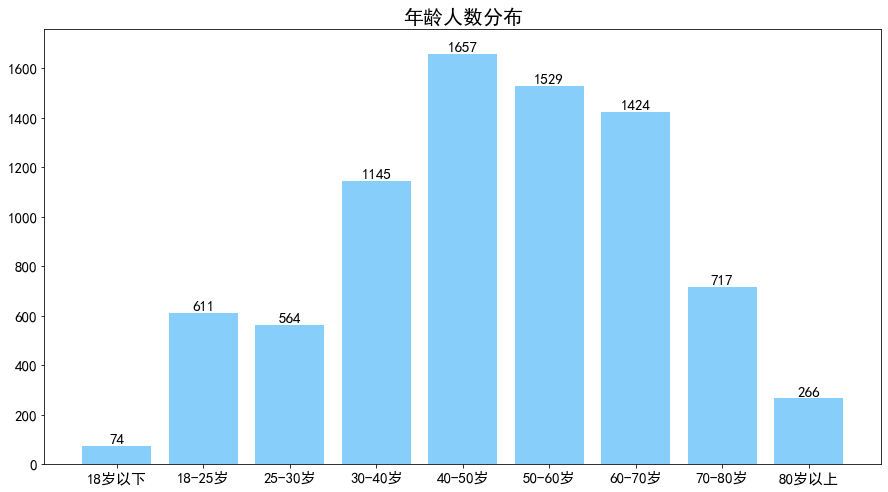

In [36]:
plt.figure(figsize=(15,8),facecolor='w')#准备画板
rects=plt.bar(dataAge.ageLevel.tolist(), dataAge.Nums.tolist(), color='LightSkyBlue')
plt.tick_params(labelsize=15)
plt.ylim(0,max(dataAge.Nums)+100)
for rect in rects:#画出柱状图数值
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2,height,str(int(height)), ha='center', va='bottom',fontsize=15)
plt.title(u'年龄人数分布',fontsize=20)
plt.show()

通过上图，我们很清晰的看出本次数据的年龄分段，可以看出本次数据的年龄覆盖范围比较广，各年龄段样本也比较充足，下边我们分析各年龄段的幸福感差异。

In [37]:
makePicture(dataAge,'ageLevel',['幸福差'],'年龄和幸福感',sort=False,tickangle_=20,colors=['LightSkyBlue'])

从上图看出，18岁到50岁之间，幸福感一直在下降，可能是因为年轻的时候事情少，面对的压力小，所以幸福感会高一些，随着年龄的增加，来自工作和家庭等各方面的事情接踵而至，幸福感就会逐渐下降；但是过了50至60岁后，幸福感有上升的趋势，这个阶段可能是因为退休了，事情变得更少，有更加充裕的时间分配自己的生活。

## 3.7性别与幸福感

性别中，1 = 男; 2 = 女; 

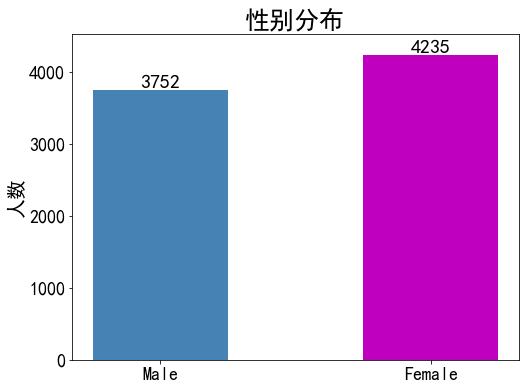

In [38]:
Gender=[ 'Male','Female']
GenderNum=dataHappiness.gender.value_counts().sort_index().values.tolist() #记录各月份人数
#准备画板
plt.figure(figsize=(8,6),facecolor='w')
rects=plt.bar(range(len(Gender)), GenderNum, width=0.5,color=['steelblue','m'])
#横轴
index=range(len(Gender))
plt.xticks(index, Gender)       
# #Y轴
plt.ylim(0,max(GenderNum)+300)
plt.ylabel(u"人数",fontsize='20') #Y轴标签
#画出柱状图数值
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha='center', va='bottom',fontsize=20)
plt.tick_params(labelsize=18)
plt.title(u'性别分布',fontsize=25)
plt.show()

上图可以看出，在数量上幸福感与性别似乎没有关系，但仅凭这张图无法做进一步具体判断，下边我们进行百分比的分析。

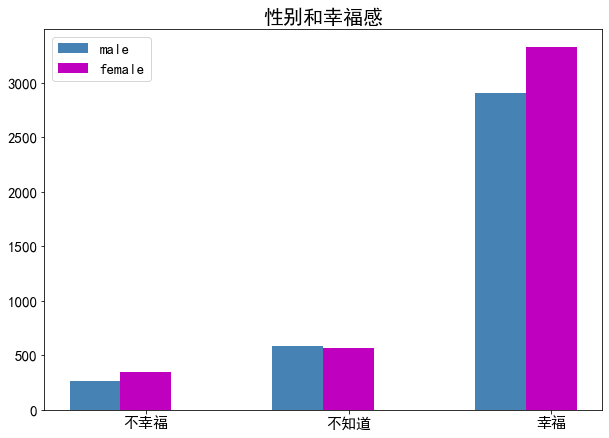

In [39]:
fig, ax = plt.subplots(figsize = (10,7))
name_list = ['不幸福','不知道','幸福'] 
Happy_Gender = dataHappiness.groupby(['gender','Happy']).car.count()

male=[Happy_Gender[1]['不幸福'],Happy_Gender[1]['不知道'],Happy_Gender[1]['幸福']]
female=[Happy_Gender[2]['不幸福'],Happy_Gender[2]['不知道'],Happy_Gender[2]['幸福']]

x = list(range(len(name_list)))  
total_width=0.5
n = 2
width = total_width / n  

plt.bar(x,male,width = width,label = 'male',color = 'steelblue')  
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x,female, width = width, label = 'female',tick_label = name_list,color = 'm')          
ax.tick_params(axis='y',labelsize=15)         
ax.tick_params(axis='x',labelsize=15)         
plt.legend(loc = "upper left",fontsize=15)  
plt.title('性别和幸福感',fontsize=20)
plt.show()  

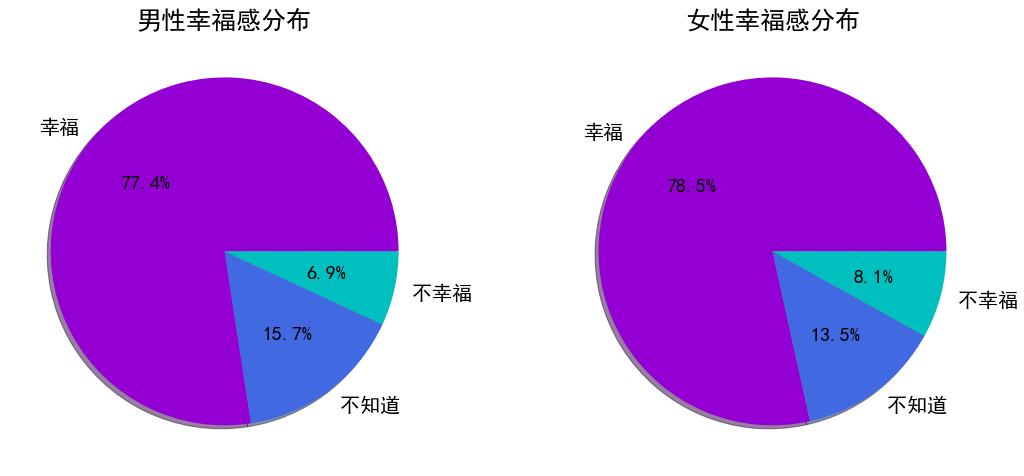

In [40]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataHappiness[dataHappiness['gender']==1].Happy.value_counts().plot.pie(autopct='%1.1f%%',colors = ['darkviolet','royalblue','c'] ,ax=ax[0],shadow=True,fontsize=20)
ax[0].set_title('男性幸福感分布',fontsize=25)
ax[0].set_ylabel('')
dataHappiness[dataHappiness['gender']==2].Happy.value_counts().plot.pie(autopct='%1.1f%%',colors = ['darkviolet','royalblue','c'],ax=ax[1],shadow=True,fontsize=20)
ax[1].set_title('女性幸福感分布',fontsize=25)
ax[1].set_ylabel('')
plt.show()

可以看出不论男性还是女性，幸福感的分布差异并没有很大区别，因此幸福感与性别无关

## 3.8学历与幸福感

下边我们分析学历与幸福感的关系，首先检查数值分布后发现有异常值'-8'，因此剔除学历中的异常值

In [41]:
dataHappiness[dataHappiness.edu==-8].edu.count()

9

In [42]:
dataHappiness.shape

(7987, 38)

In [43]:
#剔除异常值-8
newData=dataHappiness.copy(deep=True)
newData.edu.replace(-8,np.nan,inplace = True)
newData.drop(newData[newData.edu.isnull()==True].index,axis=0,inplace=True)

In [44]:
newData.shape

(7978, 38)

&emsp;&emsp;生成学历与幸福感的数据，第一列存放教育程度，第二列存放人数，第三列存放幸福的人数，第四列存放不知道的人数，第五列存放不幸福的人数，第六列存放幸福比例，这个幸福的比例就是用某个教育程度中幸福人数除以这个教育程度的总人数，同理第七列存放不知道比例，第八列存放不幸福比例，最后第九列存放幸福差，幸福差是指某个教育程度中幸福人数比例减去不幸福人数比例，其含义就是这个教育程度中幸福的人数比不幸福的人数高出多少的数据，如果这个数据越大说明这个教育程度中，幸福的人比不幸福的人更多，则说明幸福感更高。

&emsp;&emsp;在原始问卷中教育水平数值含义：1 = 没有受过任何教育; 2 = 私塾、扫盲班; 3 = 小学; 4 = 初中; 5 = 职业高中; 6 = 普通高中; 7 = 中专; 8 = 技校; 9 = 大学专科（成人高等教育）; 10 = 大学专科（正规高等教育）; 11 = 大学本科（成人高等教育）; 12 = 大学本科（正规高等教育）; 13 = 研究生及以上; 14 = 其他。


In [45]:
EduList=['没有受过任何教育','私塾或扫盲班','小学','初中','职业高中','普通高中','中专','技校','大学专科（成人高等教育）',
         '大学专科（正规高等教育）','大学本科（成人高等教育）','大学本科（正规高等教育）','研究生及以上','其他']
dataEdu=dataCompute(newData,'edu',EduList,seq=True)
dataEdu.drop(dataEdu[dataEdu.edu=='其他'].index,axis=0,inplace=True)  #剔除其他学历
dataEdu

,edu,Nums,幸福,不知道,不幸福,幸福比例,不知道比例,不幸福比例,幸福差
0,没有受过任何教育,1053.0,769.0,162.0,122.0,0.73,0.15,0.12,0.61
1,私塾或扫盲班,65.0,50.0,14.0,1.0,0.77,0.22,0.02,0.75
2,小学,1849.0,1372.0,290.0,187.0,0.74,0.16,0.10,0.64
3,初中,2264.0,1745.0,347.0,172.0,0.77,0.15,0.08,0.69
4,职业高中,89.0,73.0,9.0,7.0,0.82,0.10,0.08,0.74
5,普通高中,955.0,762.0,139.0,54.0,0.80,0.15,0.06,0.74
6,中专,350.0,284.0,52.0,14.0,0.81,0.15,0.04,0.77
7,技校,46.0,36.0,7.0,3.0,0.78,0.15,0.07,0.71
8,大学专科（成人高等教育）,187.0,159.0,22.0,6.0,0.85,0.12,0.03,0.82
9,大学专科（正规高等教育）,387.0,337.0,38.0,12.0,0.87,0.10,0.03,0.84


首先我们看看本次数据中学历分布如何

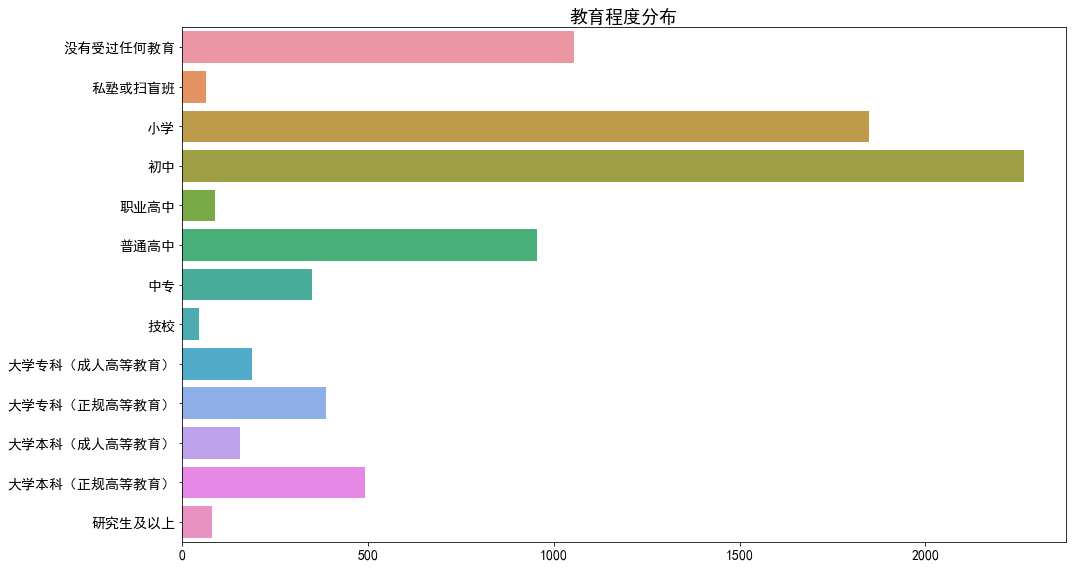

In [46]:
f,ax=plt.subplots(figsize=(15,8))
sns.barplot(x="Nums", y="edu", data=dataEdu)
plt.title('教育程度分布',fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticklabels(labels=EduList[0:13],fontsize=16)
plt.tick_params(labelsize=14)
plt.tight_layout()

下边我们看看各类教育水平下，幸福感的情况如何

In [47]:
makePicture(dataEdu,'edu',['幸福比例','不知道比例','不幸福比例'],'教育程度和幸福感',tickangle_=90)

上边这张图显示了各教育水平下幸福感的占比，可以大概看出幸福感随着学历的提升有一点上升趋势，不幸福感随着学历的提升有下降的趋势，但是仍然不太好下结论幸福感是否和学历有关系。下边我们看看幸福差的数据。

In [48]:
makePicture(dataEdu,'edu',['幸福差'],'教育程度和幸福感',tickangle_=90,colors=['darkorchid'])

从上图可以很明显的看出，幸福感比较高的都是比较高学历的人群，例如幸福感最高的是研究生和大学本科；而幸福感最低的是没有受过任何教育的人，因此可以很肯定的说教育水平很大程度上决定了幸福感。

## 3.9宗教

跟宗教相关的字段有两个是否信仰宗教`religion`,其中0代表有宗教信仰，1代表没有宗教信仰,我们首先看看这个数据的数值分布。

In [49]:
print(dataHappiness.shape)
dataHappiness.religion.value_counts()

(7987, 38)


 1    7037
 0     846
-8     104
Name: religion, dtype: int64

可以看出数据都有异常值，因此在分析前先剔除异常值。

In [50]:
#剔除异常值-8
newData=dataHappiness.copy(deep=True)
newData.religion.replace(-8,np.nan,inplace=True)
newData.drop(newData[newData.religion.isnull()==True].index,axis=0,inplace=True)

In [51]:
dataReligion=dataCompute(newData,'religion',['有宗教信仰','没有宗教信仰'],seq=True)
dataReligion

,religion,Nums,幸福,不知道,不幸福,幸福比例,不知道比例,不幸福比例,幸福差
0,有宗教信仰,846.0,683.0,106.0,57.0,0.81,0.13,0.07,0.74
1,没有宗教信仰,7037.0,5471.0,1034.0,532.0,0.78,0.15,0.08,0.70


In [52]:
makePicture(dataReligion,'religion',['幸福差'],'宗教信仰和幸福感',tickangle_=0)

上图可以看出有宗教信仰的人人群幸福比例比较高，虽然只高了4个百分点，但仍然说明有宗教信仰的人幸福感更高。

## 3.10社会认知

社会认知部分我们选取两条数据进行分析，分别是`equity`和`class`，`equity`代表认为当今社会公不公平，1 = 完全不公平; 2 = 比较不公平; 3 = 说不上公平但也不能说不公平; 4 = 比较公平; 5 = 完全公平；`class`代表认为自己目前处于哪个等级上，1 = 1(最底层); 10 = 10(最顶层)。

In [53]:
newData=dataHappiness.copy(deep=True)
print(newData['equity'].value_counts())
print(newData['class'].value_counts())
newData.shape

 4    3675
 3    1796
 2    1772
 1     441
 5     264
-8      39
Name: equity, dtype: int64
 5     2768
 4     1510
 3     1074
 6      908
 1      608
 2      513
 7      357
 8      116
-8       76
 10      37
 9       20
Name: class, dtype: int64


(7987, 38)

可以看出两列数据都有空值，因此先剔除这两列数据的空值

In [54]:
#剔除异常值-8
newData['equity'].replace(-8,np.nan,inplace=True)
newData['class'].replace(-8,np.nan,inplace=True)
newData.drop(newData[newData['equity'].isnull()==True].index,axis=0,inplace=True)
newData.drop(newData[newData['class'].isnull()==True].index,axis=0,inplace=True)
newData.shape

(7875, 38)

我们首先分析分析`equity`的幸福感情况

In [55]:
dataEquity=dataCompute(newData,'equity',['完全不公平','比较不公平','说不上公平但也不能说不公平','比较公平','完全公平'])
dataEquity

,equity,Nums,幸福,不知道,不幸福,幸福比例,不知道比例,不幸福比例,幸福差
0,完全不公平,437.0,260.0,81.0,96.0,0.59,0.19,0.22,0.37
1,比较不公平,1753.0,1120.0,372.0,261.0,0.64,0.21,0.15,0.49
2,说不上公平但也不能说不公平,1776.0,1289.0,380.0,107.0,0.73,0.21,0.06,0.67
3,比较公平,3651.0,3245.0,294.0,112.0,0.89,0.08,0.03,0.86
4,完全公平,258.0,236.0,11.0,11.0,0.91,0.04,0.04,0.87


In [56]:
makePicture(dataEquity,'equity',['幸福差'],'公平程度认知和幸福感',tickangle_=45,colors=['fuchsia'])

上图可以看出非常明显的变化趋势，即越是认为社会不公平的人幸福比例越低，越是认为社会公平的人幸福的比例越高。所以群众对社会公平的认知一定程度上能够反映幸福感的水平，当国家提高群众对社会公平的认知时，那么群众的幸福感会越来越高。

下边我们分析一下，阶级认知和幸福感的关系.

In [57]:
dataClass=dataCompute(newData,'class',range(1,11))
dataClass

,class,Nums,幸福,不知道,不幸福,幸福比例,不知道比例,不幸福比例,幸福差
0,1,602.0,338.0,116.0,148.0,0.56,0.19,0.25,0.31
1,2,506.0,294.0,119.0,93.0,0.58,0.24,0.18,0.40
2,3,1067.0,700.0,240.0,127.0,0.66,0.22,0.12,0.54
3,4,1505.0,1121.0,283.0,101.0,0.74,0.19,0.07,0.67
4,5,2762.0,2397.0,276.0,89.0,0.87,0.10,0.03,0.84
5,6,905.0,814.0,69.0,22.0,0.90,0.08,0.02,0.88
6,7,357.0,332.0,24.0,1.0,0.93,0.07,0.00,0.93
7,8,116.0,106.0,8.0,2.0,0.91,0.07,0.02,0.89
8,9,20.0,18.0,0.0,2.0,0.90,0.00,0.10,0.80
9,10,35.0,30.0,3.0,2.0,0.86,0.09,0.06,0.80


In [58]:
makePicture(dataClass,'class',['幸福差'],'阶级认知和幸福感',tickangle_=0,colors=['olive'])

从上图看出，当阶级认知越高时，幸福比例有上升的趋势，所以说对自己的阶级认知高，那么幸福感就有可能更高。这很容易解释，因为当人们认为自己的社会阶级高时，普遍会认为自己有很高的地位，很受尊重，因此内心的满足感越高。

## 3.11空闲时间

下边我们分析空闲时间和幸福感，空闲时间我们选择三个特征`socialize`(是否经常社交),`relax`(是否经常放松),`learn`(是否经常学习)；其中1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁。

In [59]:
dataHappiness.shape

(7987, 38)

In [60]:
newData=dataHappiness.copy(deep=True)

In [61]:
print(newData.socialize.value_counts())
print(newData.relax.value_counts())
print(newData.learn.value_counts())

 2    2546
 3    2484
 4    1787
 1     795
 5     371
-8       4
Name: socialize, dtype: int64
 4    3126
 3    2697
 2    1279
 5     602
 1     268
-8      15
Name: relax, dtype: int64
 1    3594
 2    2223
 3    1277
 4     684
 5     190
-8      19
Name: learn, dtype: int64


三个数据均有异常值，并且异常值数量不多，因此先替换异常值。在这里我们用中值3替换异常值。

In [62]:
newData.socialize.replace(-8,3,inplace=True)
newData.relax.replace(-8,3,inplace=True)
newData.learn.replace(-8,3,inplace=True)

In [63]:
dataFreeTime=pd.DataFrame({
        '属性':np.zeros(15),
        'Nums':np.zeros(15),
        '幸福':np.zeros(15),
        '不知道':np.zeros(15),
        '不幸福':np.zeros(15),
        '幸福比例':np.zeros(15),
        '不知道比例':np.zeros(15),
        '不幸福比例':np.zeros(15),
        '幸福差':np.zeros(15),
    })
for i in range(15):
    if i==0:
        name='socialize'
    if i==5:
        name='relax'
    if i==10:
        name='learn'
    dataFreeTime.iloc[i,0]=name
    if i%5==0:
        n=1
    dataFreeTime.iloc[i,1]=newData[name].value_counts().sort_index()[n]
    dataFreeTime.iloc[i,2]=sum(newData[dataHappiness[name]==n].Happy=='幸福')
    dataFreeTime.iloc[i,3]=sum(newData[dataHappiness[name]==n].Happy=='不知道')
    dataFreeTime.iloc[i,4]=sum(newData[dataHappiness[name]==n].Happy=='不幸福')
    dataFreeTime.iloc[i,5]=round(dataFreeTime.iloc[i,2]/dataFreeTime.iloc[i,1],2)
    dataFreeTime.iloc[i,6]=round(dataFreeTime.iloc[i,3]/dataFreeTime.iloc[i,1],2)
    dataFreeTime.iloc[i,7]=round(dataFreeTime.iloc[i,4]/dataFreeTime.iloc[i,1],2)
    dataFreeTime.iloc[i,8]=dataFreeTime.iloc[i,5]-dataFreeTime.iloc[i,7]
    n+=1
dataFreeTime=dataFreeTime.set_index('属性')

In [64]:
x_coord=['从不','很少','有时','经常','非常频繁']
trace1 = go.Scatter(x=x_coord,y=dataFreeTime.loc['socialize']['幸福差'],name="平时社交程度",
                    mode='lines+markers',line=dict(width=3,color='olive'),)
trace2 = go.Scatter(x=x_coord,y=dataFreeTime.loc['relax']['幸福差'],name="平时放松程度",
                    mode='lines+markers',line=dict(width=3,color='teal'),)
trace3 = go.Scatter(x=x_coord,y=dataFreeTime.loc['learn']['幸福差'],name="平时学习程度",
                    mode='lines+markers',line=dict(width=3,color='darkslateblue'),)
data = [trace1,trace2,trace3]
layout = dict(title = '空闲时间和幸福感',plot_bgcolor='white',
              xaxis= dict(gridcolor='lightgray',tickfont=dict(size=15,color='black'),ticklen= 5,tickangle=0,zeroline= False),
              yaxis=dict(gridcolor='lightgray',title='',range=[0.5,0.9],tickfont=dict(size=15,color='black'),ticklen= 5),
              autosize = False, width = 900, height = 500,)
fig=dict(data=data,layout=layout)
iplot(fig)

上图中非常明显的看出，随着`socialize`(是否经常社交),`relax`(是否经常放松),`learn`(是否经常学习)程度的增加，幸福感比例有明显的上升趋势。说明平时适当的利用空闲时间进行社交、放松、学习都有利于幸福感的提高。

## 3.12住房条件

In [65]:
newData=dataHappiness.copy(deep=True)
newData.shape

(7987, 38)

下边我们分析居住的面积`floor_area`和幸福感的关系。首先对这一列的空值做处理，检测后发现有260行空值，因此先剔除掉这一列的空值。

In [66]:
newData.drop(newData[newData.floor_area.isnull()==True].index,axis=0,inplace=True)
newData.floor_area.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



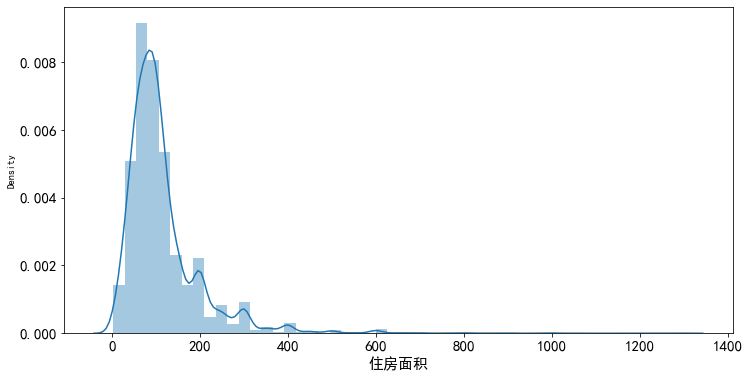

In [67]:
plt.figure(figsize=(12, 6))
sns.distplot(newData.floor_area)
plt.tick_params(labelsize=15)
plt.xlabel('住房面积',fontsize=15)
plt.show()

可以看出住房面积分布不均匀从0至600不等，因此我们先将住房面积进行划分等级。

In [68]:
newData['aera']=0

In [69]:
newData.loc[newData[newData['floor_area']<=50].index,'aera']=1
newData.loc[newData[(newData['floor_area']>50)&(newData['floor_area']<=100)].index,'aera']=2
newData.loc[newData[(newData['floor_area']>100)&(newData['floor_area']<=150)].index,'aera']=3
newData.loc[newData[(newData['floor_area']>150)&(newData['floor_area']<=200)].index,'aera']=4
newData.loc[newData[(newData['floor_area']>200)&(newData['floor_area']<=300)].index,'aera']=5
newData.loc[newData[newData['floor_area']>300].index,'aera']=6

In [70]:
dataAera=dataCompute(newData,'aera',['50平以下','50-100平','100-150平','150-200平','200-300平','300平以上'],seq=True)
dataAera

,aera,Nums,幸福,不知道,不幸福,幸福比例,不知道比例,不幸福比例,幸福差
0,50平以下,1244.0,861.0,246.0,137.0,0.69,0.20,0.11,0.58
1,50-100平,3559.0,2780.0,515.0,264.0,0.78,0.14,0.07,0.71
2,100-150平,1690.0,1390.0,201.0,99.0,0.82,0.12,0.06,0.76
3,150-200平,740.0,580.0,101.0,59.0,0.78,0.14,0.08,0.70
4,200-300平,529.0,426.0,73.0,30.0,0.81,0.14,0.06,0.75
5,300平以上,225.0,191.0,22.0,12.0,0.85,0.10,0.05,0.80


In [71]:
makePicture(dataAera,'aera',['幸福差'],'住房面积和幸福感',tickangle_=0,colors=['tomato'])

可以看出，当住房面积上升时，幸福感有非常明显的上升趋势，虽然在150-200平时有下降，但整体看上去仍然是上升的趋势。

## 3.13经济层面与幸福感分析

经济层面我们分析`年收入income`和`经济状况变化status_3_before`

In [72]:
dataEconomy=dataHappiness.copy(deep=True)

我们先分析年收入`income`,首先检查异常数据，年收入小于0视为异常。

In [73]:
print(dataEconomy.shape)
print(sum(dataEconomy.income<0))

(7987, 38)
434


In [74]:
dataEconomy.drop(dataEconomy[dataEconomy.income<0].index,axis=0,inplace=True)#剔除年收入异常数据
print(dataEconomy.shape)
print(sum(dataEconomy.income<0))

(7553, 38)
0


年收入是连续型数据，我们在这里对年收入做分段处理，添加新的一列`YearLevel`作为年收入的等级。其中年收入2w以下取为1，年收入2w-5w以下取为2，年收入5w-10w以下取为3，年收入10w-20w以下取为4，年收入20w-50w以下取为5，年收入50w以上以下取为6。

In [75]:
dataEconomy['YearLevel']=0
dataEconomy.loc[dataEconomy[(dataEconomy['income']<=20000)].index,'YearLevel']=1
dataEconomy.loc[dataEconomy[(dataEconomy['income']>20000)&(dataEconomy['income']<=50000)].index,'YearLevel']=2
dataEconomy.loc[dataEconomy[(dataEconomy['income']>50000)&(dataEconomy['income']<=100000)].index,'YearLevel']=3
dataEconomy.loc[dataEconomy[(dataEconomy['income']>100000)&(dataEconomy['income']<=200000)].index,'YearLevel']=4
dataEconomy.loc[dataEconomy[(dataEconomy['income']>200000)&(dataEconomy['income']<=500000)].index,'YearLevel']=5
dataEconomy.loc[dataEconomy[(dataEconomy['income']>500000)].index,'YearLevel']=6

In [76]:
dataIncome=dataCompute(dataEconomy,'YearLevel',['2w以下','2w-5w','5w-10w','10w-20w','20w-50w','50w以上'],seq=True)
dataIncome

,YearLevel,Nums,幸福,不知道,不幸福,幸福比例,不知道比例,不幸福比例,幸福差
0,2w以下,4334.0,3242.0,665.0,427.0,0.75,0.15,0.10,0.65
1,2w-5w,2339.0,1925.0,315.0,99.0,0.82,0.13,0.04,0.78
2,5w-10w,667.0,550.0,90.0,27.0,0.82,0.13,0.04,0.78
3,10w-20w,146.0,124.0,18.0,4.0,0.85,0.12,0.03,0.82
4,20w-50w,39.0,35.0,3.0,1.0,0.90,0.08,0.03,0.87
5,50w以上,28.0,26.0,1.0,1.0,0.93,0.04,0.04,0.89


In [77]:
makePicture(dataIncome,'YearLevel',['幸福差'],'年收入和幸福感',sort=False,tickangle_=0,colors=['dodgerblue'])

上图中横轴是个人年收入，纵轴是对应的幸福比例，从上图中很明显的看出，随着年收入的增加，幸福感比例有明显的上升趋势，可以很容易理解，因为年收入高了，不必再因为资金的问题而困扰，因此生活会更加轻松一些。

接下来我们分析经济状况的变化，`status_3_before`表示经济状况与3年前相比，社会经济地位的变化。1 = 上升了; 2 = 差不多; 3 = 下降了。我们首先对这一属性的异常值做检测。发现有39个异常值，在这里进行删除。

In [78]:
dataEconomy.status_3_before.value_counts()

 2    4177
 1    2567
 3     770
-8      39
Name: status_3_before, dtype: int64

In [79]:
dataEconomy.status_3_before.replace(-8,np.nan,inplace=True)
dataEconomy.drop(dataEconomy[dataEconomy.status_3_before.isnull()==True].index,axis=0,inplace=True)

In [80]:
dataStatusBefore=dataCompute(dataEconomy,'status_3_before',['下降了','差不多','上升了'],False)
dataStatusBefore

,status_3_before,Nums,幸福,不知道,不幸福,幸福比例,不知道比例,不幸福比例,幸福差
0,下降了,770.0,470.0,156.0,144.0,0.61,0.20,0.19,0.42
1,差不多,4177.0,3211.0,669.0,297.0,0.77,0.16,0.07,0.70
2,上升了,2567.0,2197.0,260.0,110.0,0.86,0.10,0.04,0.82


In [81]:
makePicture(dataStatusBefore,'status_3_before',['幸福差'],'经济状态变化和幸福感',sort=False,tickangle_=0,colors=['mediumvioletred'])

可以很明显的看出，社会经济地位越上升，其幸福感越强，这一上升趋势非常明显，说明社会经济地位对于一个人的幸福感来说非常重要。

## 4 总结

本案例基于中国人民大学《中国综合社会调查》公开数据，数据围绕着个人的社会属性，包含个体信息(性别年龄)、经济状况、社会认知等等。通过对数据的探索，发现各个属性与幸福感的关系。

  首先我们对数据做了处理，剔除了部分空值较多的列，接着剔除了对分析没有作用的属性，然后统计了各属性的取值个数。

  然后我们对幸福感进行了分析，发现78%的人是幸福的，7.5%的人是不幸福的，14.5%的人不知道自己是不是幸福。

  接着我们分析了其他属性和幸福感关系，发现城镇类型并不影响幸福感的情况，因为不论是城市数据还是农村数据，幸福感的分布都差不多；对于省份，我们发现内蒙古是幸福感最高的城市，而宁夏是最不幸福的城市，这或许与地理位置和环境有关；对于年龄的分析，我们发现从一开始幸福感一直在下降，但随后有上升的趋势；对于性别，我们并没有发现幸福感的差异，不论是男性还是女性，幸福感的分布差异不大，幸福人群的比例都在78%左右；对于学历，我们得出结论随着学历的增高，幸福感有增加的趋势，其中硕士以上学历的人幸福感最高(91%)，毕竟对于大部分学历较高的人来说他们经济能力和社会资源更多，可能会享受更高的社会待遇，因此幸福感要更强烈一些；对于宗教来说，有宗教信仰的人比没有宗教信仰的人幸福感略微高一点点，只高出4个百分点；对于社会认知，认为社会越公平的人幸福感越高，认为社会越不公平的人，体验到的幸福感越低，而随着阶级认知的增加，幸福感有增加的趋势，但又逐渐下降，或许阶级非常高的人能满足他们的事情越来越少，从而导致幸福感会下降；对空闲时间的分析发现，学习频率越高的人幸福感越高，而社交程度和放松程度会使幸福感增加，但超过某个界限后幸福感有下降，说明社交和生活放松需要合适的程度最佳；对住房面积的分析发现，随着住房面积的增加，幸福感有上升的趋势；最后对经济条件做分析发现经济条件越高幸福感越高，年收入50万以上的人幸福感89%，而年收入2万以下的人幸福感只有65%，同时认为自己经济在增长的人也感受到了更高的幸福感。
  
  
   本次案例只分析了部分数据，但幸福感的研究肯定不止这些因素，可以考虑在后边的学习中对其他数据做进一步分析。